In [3]:
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency

In [5]:
import pandas as pd

df = pd.read_csv("HR-Employee-Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# value_counts for all the categories in the data

for column in df.select_dtypes(include=["object", "category"]):
  print(f"\n--- Value counts for column: {column} ---")
  print("--------------------")
  print(df[column].value_counts())



--- Value counts for column: Attrition ---
--------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64

--- Value counts for column: BusinessTravel ---
--------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

--- Value counts for column: Department ---
--------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

--- Value counts for column: EducationField ---
--------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

--- Value counts for column: Gender ---
--------------------
Gender
Male      882
Female    588
Name: count, dtype: int64

--- Value counts for column: JobRole ---
--------------------
JobRole
Sales Executive              326
Research Sc

In [11]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [12]:
df.shape

(1470, 35)

In [13]:
# remove duplicates

df.drop_duplicates(inplace=True)


DATA PREPROCESSING

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
#creation of a new column
df['retention'] = df['Attrition'].apply(lambda x: 'Yes' if x == "No"  else 'No')


In [16]:
#checking the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,retention
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,No
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Yes
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,No
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Yes
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Yes


In [18]:
#checking for the count for each categories
df['retention'].value_counts()

retention
Yes    1233
No      237
Name: count, dtype: int64

DATA SAMPLING

In [19]:
# Random extraction of 20% of the data from the cleaned dataset for subsequent analysis.

#for the first analysis
df_sample = df.sample(frac=0.2, random_state=42)  #random state helps to ensure consistency in results

# Convert the categorical columns into numerical values
df_sample['retention'] = df_sample['retention'].map({'Yes': 0, 'No': 1})
df_sample['Attrition'] = df_sample['Attrition'].map({'Yes': 1, 'No': 0})
df_sample['BusinessTravel'] = df_sample['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})


In [20]:
df_sample.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,retention
1041,28,0,1,866,Sales,5,3,Medical,1,1469,...,80,0,6,4,3,5,4,1,3,0
184,53,0,1,1084,Research & Development,13,2,Medical,1,250,...,80,2,5,3,3,4,2,1,3,0
1222,24,1,1,240,Human Resources,22,1,Human Resources,1,1714,...,80,1,1,2,3,1,0,0,0,1
67,45,0,1,1339,Research & Development,7,3,Life Sciences,1,86,...,80,1,25,2,3,1,0,0,0,0
220,36,0,1,1396,Research & Development,5,2,Life Sciences,1,304,...,80,0,16,3,4,13,11,3,7,0


DATA ANALYSIS

In [21]:
# Using chi-square test to check if there is an effect of Business travel on Retention

import pandas as pd
contingency_table = pd.crosstab(df_sample['BusinessTravel'], df_sample['retention'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test statistic for business travel and retention:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square test statistic for business travel and retention: 4.727856276046321
P-value: 0.09405005503919878
Degrees of freedom: 2
Expected frequencies:
[[ 32.09183673   4.90816327]
 [180.40816327  27.59183673]
 [ 42.5          6.5       ]]


In [22]:

contingency_table = pd.crosstab(df_sample['BusinessTravel'], df_sample['retention'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)

results = pd.DataFrame({
    'Chi-square Statistic': [chi2],
    'P-value': [pval],
    'Degrees of Freedom': [dof],
})

print("Chi-square test results:")
print(results.to_string())


Chi-square test results:
   Chi-square Statistic  P-value  Degrees of Freedom
0              4.727856  0.09405                   2


In [23]:
# Using logistics regression test to check distance from home affects retention

import statsmodels.api as sm

# Define the model
logit_model = sm.Logit(df_sample['retention'], df_sample['DistanceFromHome'])

# Fit the model
logit_result = logit_model.fit()

# Print the model summary
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.548053
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              retention   No. Observations:                  294
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            0
Date:                Sun, 12 May 2024   Pseudo R-squ.:                 -0.4002
Time:                        15:48:18   Log-Likelihood:                -161.13
converged:                       True   LL-Null:                       -115.07
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
DistanceFromHome    -0.1194      0.017     -7.183      0.000      -0.152      -0.087


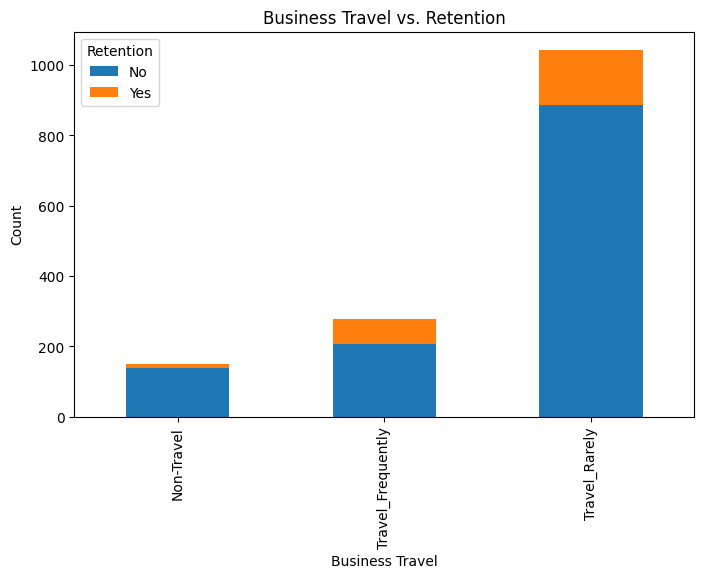

In [24]:
# a clustered bar chart between business travel and retention

import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of business travel and retention
ct = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Create a bar chart of the crosstab
fig, ax = plt.subplots(figsize=(8, 5))

ct.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Business Travel')
ax.set_ylabel('Count')
ax.set_title('Business Travel vs. Retention')

# Add legend
ax.legend(title='Retention')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

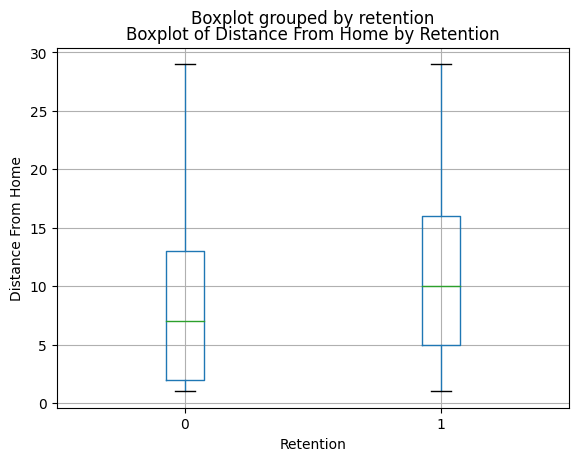

In [25]:
# a chart that confirms the result of the tests above using box chart

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_sample.boxplot(column='DistanceFromHome', by='retention', grid=True)
plt.title('Boxplot of Distance From Home by Retention')
plt.xlabel('Retention')
plt.ylabel('Distance From Home')
plt.show()


for analysis 2

In [26]:
# Use Chi-square test to check if there is an effect of Job involvement, Job satisfaction on Retention

import pandas as pd
# Create a contingency table for Job Involvement and Retention
contingency_table_jr = pd.crosstab(df_sample['JobInvolvement'], df_sample['retention'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(contingency_table_jr)

# Print the results
print("Chi-square test statistic for job involvement and retention:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Create a contingency table for Job Satisfaction and Retention
contingency_table_jor = pd.crosstab(df_sample['JobSatisfaction'], df_sample['retention'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(contingency_table_jor)

# Print the results
print('/n')
print("Chi-square test statistic for Job satisfaction and retention:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square test statistic for job involvement and retention: 10.545291011017321
P-value: 0.014456788654364956
Degrees of freedom: 3
Expected frequencies:
[[ 13.01020408   1.98979592]
 [ 61.58163265   9.41836735]
 [153.52040816  23.47959184]
 [ 26.8877551    4.1122449 ]]
/n
Chi-square test statistic for Job satisfaction and retention: 5.486733844874779
P-value: 0.13943423694030707
Degrees of freedom: 3
Expected frequencies:
[[57.24489796  8.75510204]
 [39.03061224  5.96938776]
 [81.53061224 12.46938776]
 [77.19387755 11.80612245]]


In [27]:
# Use Chi-square test to check if there is an effect of Job involvement, Job satisfaction on Education

import pandas as pd
# Create a contingency table for Job Involvement and Education
contingency_table_je = pd.crosstab(df_sample['JobInvolvement'], df_sample['Education'])

# Perform the chi-square test"
chi2, pval, dof, expected = chi2_contingency(contingency_table_je)

# Print the results
print("Chi-square test statistic for Job involvement and Education:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Create a contingency table for Job Satisfaction and Education
contingency_table_joe = pd.crosstab(df_sample['JobSatisfaction'], df_sample['Education'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(contingency_table_joe)

# Print the results
print("Chi-square test statistic for Job Satisfaction and Education:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square test statistic for Job involvement and Education: 12.848427960452398
P-value: 0.38015324158753866
Degrees of freedom: 12
Expected frequencies:
[[ 1.12244898  3.21428571  6.02040816  4.13265306  0.51020408]
 [ 5.31292517 15.21428571 28.49659864 19.56122449  2.41496599]
 [13.24489796 37.92857143 71.04081633 48.76530612  6.02040816]
 [ 2.31972789  6.64285714 12.44217687  8.54081633  1.05442177]]
Chi-square test statistic for Job Satisfaction and Education: 7.796825459421656
P-value: 0.8007994133117299
Degrees of freedom: 12
Expected frequencies:
[[ 4.93877551 14.14285714 26.48979592 18.18367347  2.24489796]
 [ 3.36734694  9.64285714 18.06122449 12.39795918  1.53061224]
 [ 7.03401361 20.14285714 37.72789116 25.89795918  3.19727891]
 [ 6.65986395 19.07142857 35.72108844 24.52040816  3.02721088]]


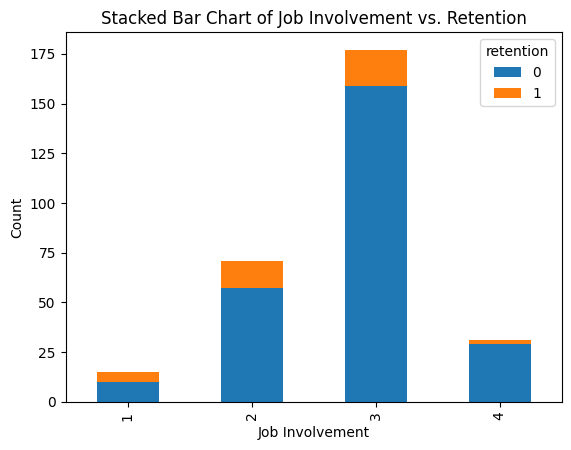

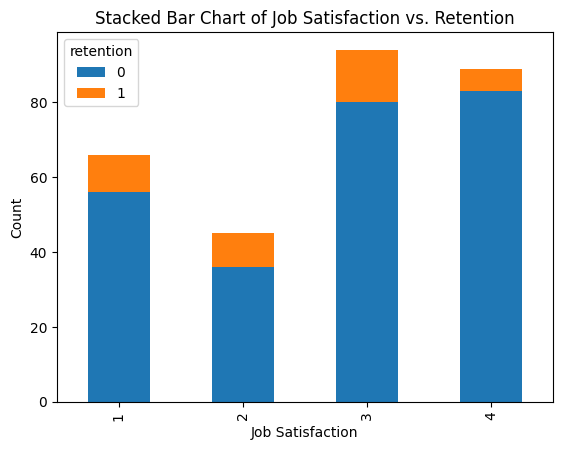

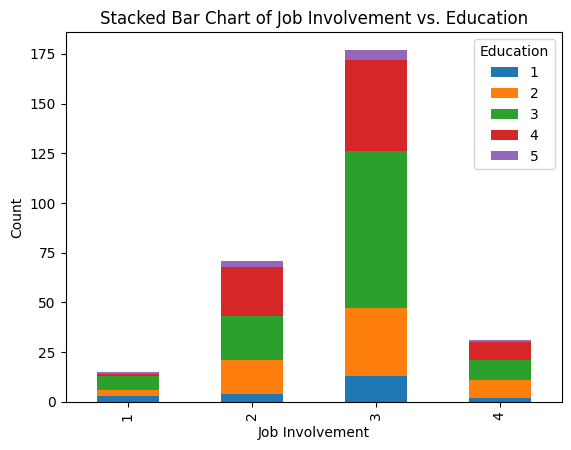

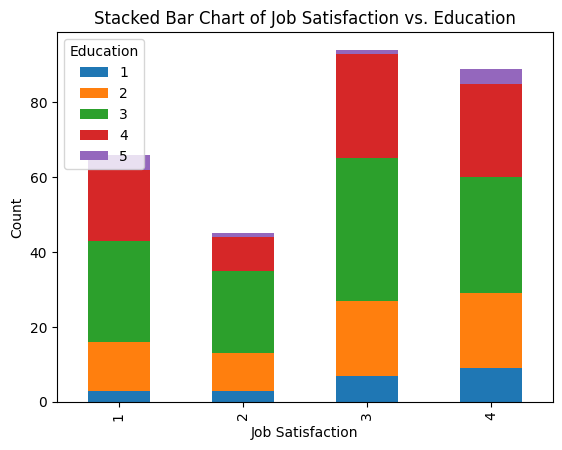

In [28]:
# a chart that confirms the result of the tests above using stacked bar chart

import matplotlib.pyplot as plt
# Create a stacked bar chart for Job Involvement and Retention
contingency_table_jr.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Job Involvement")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Job Involvement vs. Retention")

# Show the plot
plt.show()

# Create a stacked bar chart for Job Satisfaction and Retention
contingency_table_jor.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Job Satisfaction vs. Retention")

# Show the plot
plt.show()

# Create a stacked bar chart for Job Involvement and Education
contingency_table_je.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Job Involvement")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Job Involvement vs. Education")

# Show the plot
plt.show()

# Create a stacked bar chart for Job Satisfaction and Education
contingency_table_joe.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Job Satisfaction vs. Education")

# Show the plot
plt.show()


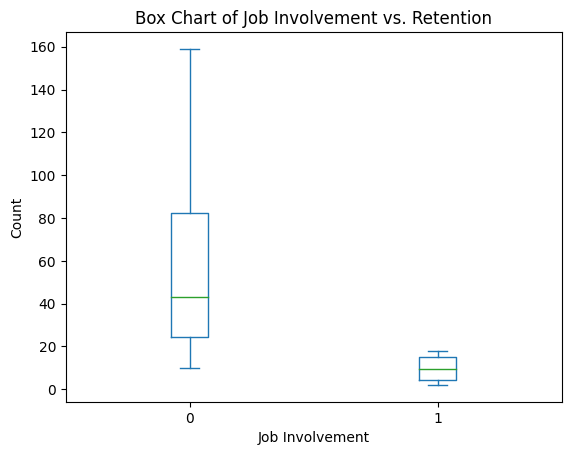

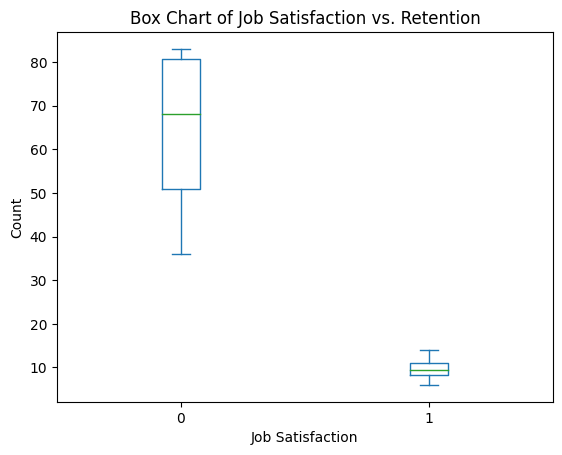

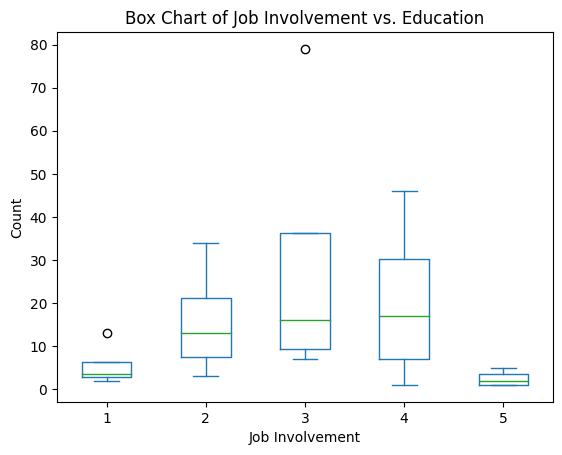

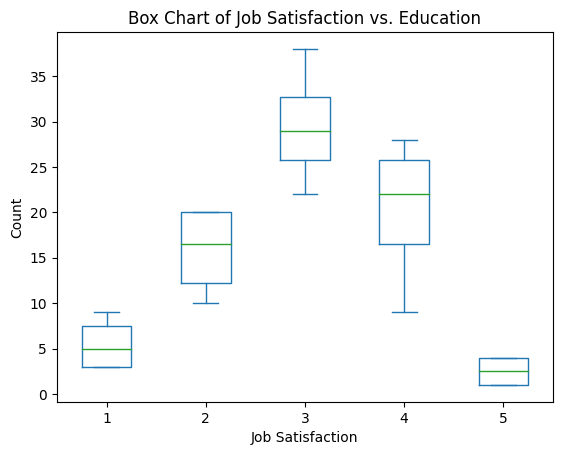

In [29]:
# prompt: plots box chart instead of bar charts above

import matplotlib.pyplot as plt
# Create a box chart for Job Involvement and Retention
contingency_table_jr.plot(kind="box")

# Add labels and title
plt.xlabel("Job Involvement")
plt.ylabel("Count")
plt.title("Box Chart of Job Involvement vs. Retention")

# Show the plot
plt.show()

# Create a box chart for Job Satisfaction and Retention
contingency_table_jor.plot(kind="box")

# Add labels and title
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Box Chart of Job Satisfaction vs. Retention")

# Show the plot
plt.show()

# Create a box chart for Job Involvement and Education
contingency_table_je.plot(kind="box")

# Add labels and title
plt.xlabel("Job Involvement")
plt.ylabel("Count")
plt.title("Box Chart of Job Involvement vs. Education")

# Show the plot
plt.show()

# Create a box chart for Job Satisfaction and Education
contingency_table_joe.plot(kind="box")

# Add labels and title
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Box Chart of Job Satisfaction vs. Education")

# Show the plot
plt.show()
